<a href="https://colab.research.google.com/github/surajjorwar/NYC-taxi-trip-time-prediction-/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('/content/drive/MyDrive/Copy of NYC Taxi Data.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
df.shape # their are  1458644 Rows and 11 columns in this data set

(1458644, 11)

# ***1.Trip time duration distributuon  over different localities ***

Manhattan:

Minimum Latitude: 40.699 - Lower tip of Manhattan
Maximum Latitude: 40.878 - Inwood Hill Park area
Minimum Longitude: -74.018 - Battery Park area
Maximum Longitude: -73.907 - Harlem area
Brooklyn:

Minimum Latitude: 40.576 - South Brooklyn near Coney Island
Maximum Latitude: 40.739 - North Brooklyn near Greenpoint
Minimum Longitude: -74.041 - West Brooklyn near Bay Ridge
Maximum Longitude: -73.833 - East Brooklyn near Highland Park
Queens:

Minimum Latitude: 40.489 - Southern part of Queens
Maximum Latitude: 40.813 - Northern part of Queens
Minimum Longitude: -73.962 - Western part of Queens
Maximum Longitude: -73.700 - Eastern part of Queens
Bronx:

Minimum Latitude: 40.785 - Southern part of the Bronx
Maximum Latitude: 40.917 - Northern part of the Bronx
Minimum Longitude: -73.933 - Western part of the Bronx
Maximum Longitude: -73.765 - Eastern part of the Bronx
Staten Island:

Minimum Latitude: 40.477 - Southern tip of Staten Island
Maximum Latitude: 40.652 - Northern tip of Staten Island
Minimum Longitude: -74.259 - Western part of Staten Island
Maximum Longitude: -74.034 - Eastern part of Staten Island

creating two new columns p_loc and d_loc which is picking location and droping location  created on the basis of longititude and latitude of pick and drop ,which gives the names of Boroughs top 5 areas in NEWYORK CITY





In [7]:
#Manhattan
df.loc[df['pickup_latitude'].between(40.699, 40.878) & df['pickup_longitude'].between(-74.018, -73.907), 'p_loc'] = 'Manhattan'
df.loc[df['dropoff_latitude'].between(40.699, 40.878) & df['dropoff_longitude'].between(-74.018, -73.907), 'd_loc'] = 'Manhattan'

#Brooklyn
df.loc[df['pickup_latitude'].between(40.576, 40.739) & df['pickup_longitude'].between(-74.041, -73.833), 'p_loc'] = 'Brooklyn'
df.loc[df['dropoff_latitude'].between(40.576, 40.739) & df['dropoff_longitude'].between(-74.041, -73.833), 'd_loc'] = 'Brooklyn'

#Queens
df.loc[df['pickup_latitude'].between(40.489, 40.813) & df['pickup_longitude'].between(-73.962, -73.700), 'p_loc'] = 'Queens'
df.loc[df['dropoff_latitude'].between(40.489, 40.813) & df['dropoff_longitude'].between(-73.962, -73.700), 'd_loc'] = 'Queens'

#Bronx
df.loc[df['pickup_latitude'].between(40.785, 40.917) & df['pickup_longitude'].between(-73.933, -73.765), 'p_loc'] = 'Bronx'
df.loc[df['dropoff_latitude'].between(40.785, 40.917) & df['dropoff_longitude'].between(-73.933, -73.765), 'd_loc'] = 'Bronx'

#Staten_Island
df.loc[df['pickup_latitude'].between(40.477, 40.652) & df['pickup_longitude'].between(-74.259, -74.034), 'p_loc'] = 'Staten_Island'
df.loc[df['dropoff_latitude'].between(40.477, 40.652) & df['dropoff_longitude'].between(-74.259, -74.034), 'd_loc'] = 'Staten_Island'


In [8]:
result = df.groupby(['p_loc', 'd_loc'])['trip_duration'].sum().reset_index()
result.fillna(1)
result['trip_duration'] =  (result['trip_duration']/3600).round(0)


In [9]:
pivot = result.pivot_table(columns = 'p_loc' ,index =  'd_loc', values = 'trip_duration')

In [10]:
pivot

p_loc,Bronx,Brooklyn,Manhattan,Queens,Staten_Island
d_loc,,,,,
Bronx,216.0,971.0,2796.0,1845.0,NaN
Brooklyn,29.0,31667.0,44124.0,16307.0,1.0
Manhattan,146.0,39656.0,104981.0,46621.0,24.0
Queens,125.0,19069.0,49738.0,26855.0,3.0
Staten_Island,NaN,116.0,158.0,159.0,12.0


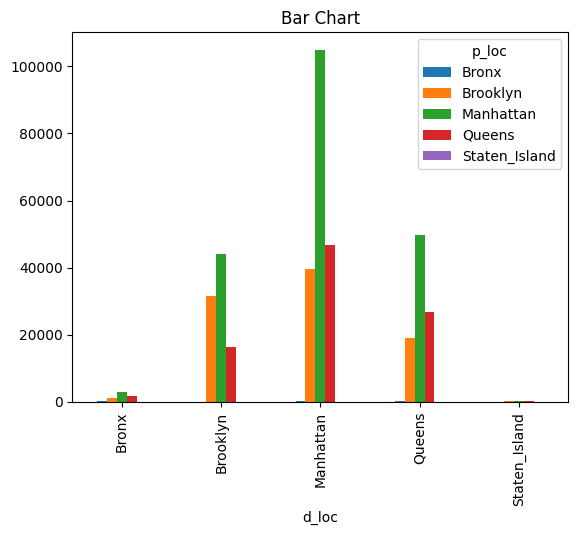

In [11]:
#bar plot
pivot.plot(kind='bar')
plt.title('Bar Chart')
plt.show()

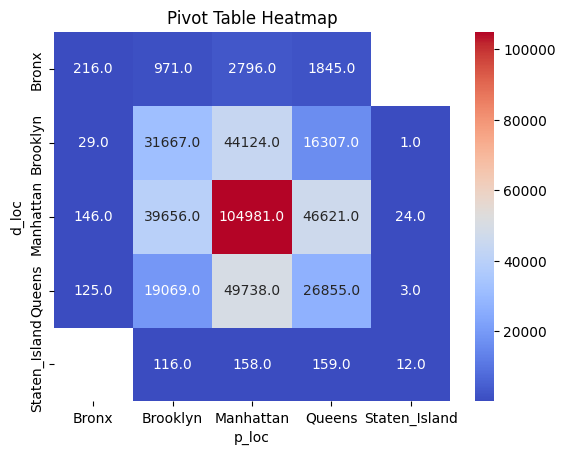

In [12]:
# Heatmap
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Pivot Table Heatmap')
plt.show()

the trip within  manhattan   has the highest time duration ,then manhattan to queens then manhattan to brooklyn ,bronx and staten island has lowest trip duration

# .Trip time duration distributuon over different localities on weekends  *

In [37]:
# extract weekdays and weekends from pickup_datetime

df['week_day'] = df['pickup_datetime'].dt.day_name()
df['weekend'] = df['week_day'].isin(['Saturday', 'Sunday'])
weekend_df = df[df['weekend']==True]

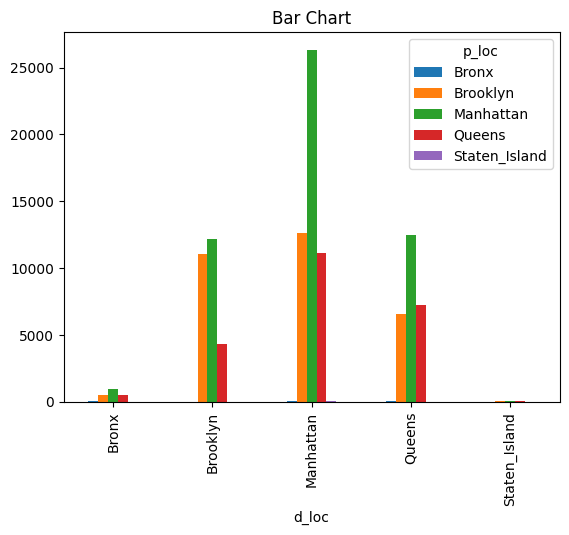

In [38]:
WE_result = weekend_df.groupby(['p_loc', 'd_loc'])['trip_duration'].sum().reset_index()
WE_result.fillna(1)
WE_result['trip_duration'] =  (WE_result['trip_duration']/3600).round(0)
WE_pivot = WE_result.pivot_table(columns = 'p_loc' ,index =  'd_loc', values = 'trip_duration')
WE_pivot.plot(kind='bar')
plt.title('Bar Chart')
plt.show()

# **2. busiest hours of the day**

In [13]:
#busiest hour of the day
df['pickup_datetime']  =  pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] =  pd.to_datetime(df['dropoff_datetime'])


In [14]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,p_loc,d_loc
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Brooklyn,Brooklyn
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Manhattan,Brooklyn
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Brooklyn,Brooklyn
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Manhattan,Manhattan


In [15]:
#creating pick up hour  column
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

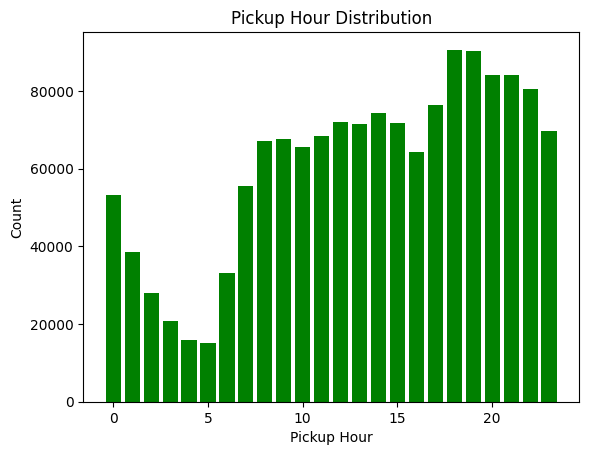

In [16]:
pickup_hour_counts = df.groupby('pickup_hour').size().reset_index(name='count')
plt.bar(pickup_hour_counts['pickup_hour'], pickup_hour_counts['count'],color = 'green')

plt.xlabel('Pickup Hour')
plt.ylabel('Count')
plt.title('Pickup Hour Distribution')
plt.show()

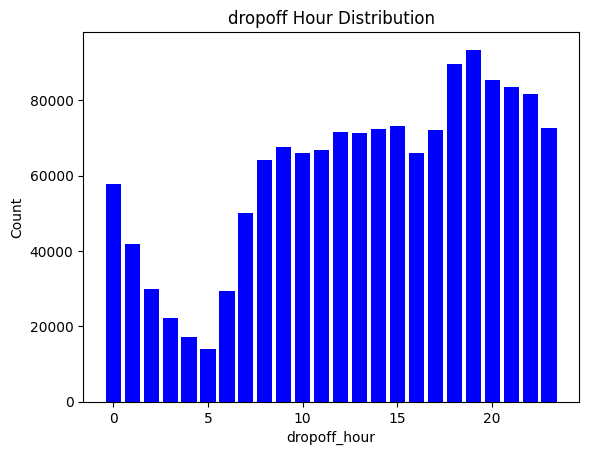

In [17]:
pickup_hour_counts = df.groupby('dropoff_hour').size().reset_index(name='count')
plt.bar(pickup_hour_counts['dropoff_hour'], pickup_hour_counts['count'],color = 'blue')
plt.xlabel('dropoff_hour')
plt.ylabel('Count')
plt.title('dropoff Hour Distribution')
plt.show()

# these are the busiest hours as we can see from morning 9 am to 4 pm and 6 pm to 11 pm is the busiest hours in the day,perticullarly 7 to 8 pm are the most busiest hours of the day

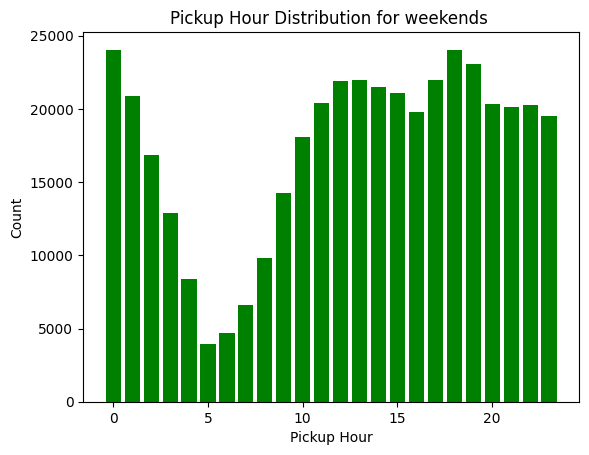

In [18]:
# busiest hours for weekends
PHC_weekend_df_ = weekend_df.groupby('pickup_hour').size().reset_index(name='count')
plt.bar(PHC_weekend_df_['pickup_hour'], PHC_weekend_df_['count'],color = 'green')

plt.xlabel('Pickup Hour')
plt.ylabel('Count')
plt.title('Pickup Hour Distribution for weekends ')
plt.show()

# these are the busiest hours as we can see from morning 1am to 3 and from 11am to 12 pm  is the busiest hours in the weekends,perticullarly 11am to 1pm are the most busiest hours of the day

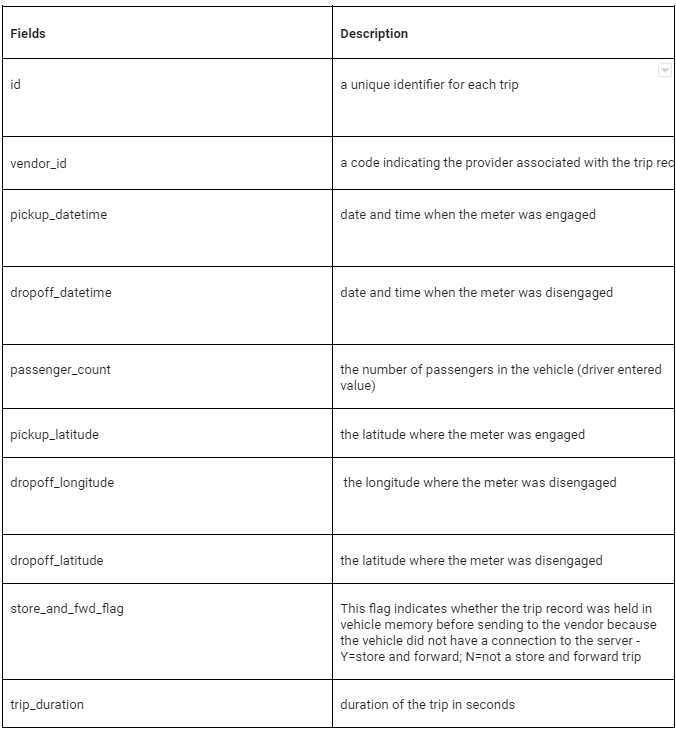

In [19]:
Image('https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Regression_NYC_Taxi_Trip_Time_Prediction_91a23744ad.png')

#** 3.DO booking happens more on weekdays or weekends**

In [20]:
nd = df.groupby('weekend')['trip_duration'].sum().reset_index()
print(nd)

   weekend  trip_duration
0    False     1014013798
1     True      385543849


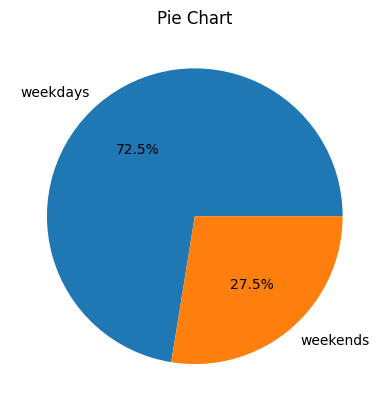

In [21]:
 #dristribution weekdays and weekends by trip_duration
import matplotlib.pyplot as plt
labels = ['weekdays','weekends']
plt.pie(nd['trip_duration'], labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.show()

# booking happens more in weekdays combine than weekends combine

# distribution of taxi trip time duration by weekdays and weekends  ,weekdays is 72.5% and weekends is 27.5%

# 4.does passenger count affect  trip duration

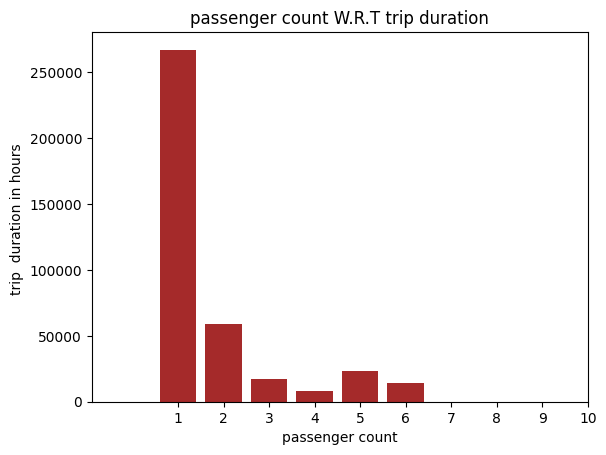

In [26]:
pd =df.groupby('passenger_count')['trip_duration'].sum().reset_index()
plt.bar(pd['passenger_count'].unique(),pd['trip_duration']/ 3600,color ='brown')
plt.xlabel('passenger count')
plt.ylabel('trip  duration in hours ')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title('passenger count W.R.T trip duration')
plt.show()

# majority of passenger count with highest trip duration is 1  then 2  and 5

# **5. trip duration W.R.T vendor id **

In [58]:
vid_df = df.groupby('vendor_id')['trip_duration'].sum().reset_index()
vid_df

,vendor_id,trip_duration
0,1,573496269
1,2,826061378


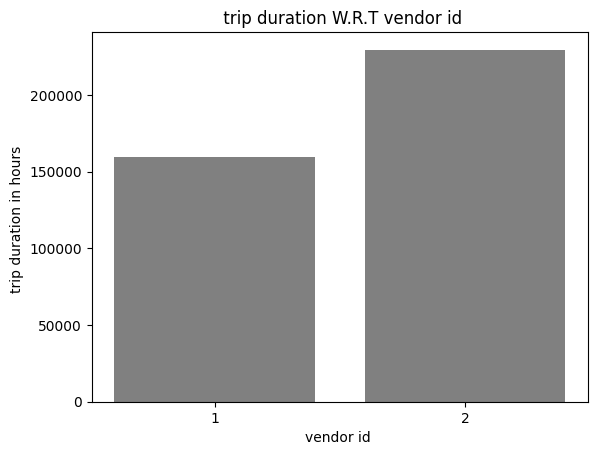

In [59]:
plt.bar(vid_df['vendor_id'], vid_df['trip_duration']/3600,color ='grey')
plt.xlabel('vendor id ')
plt.xticks([1,2])
plt.ylabel('trip duration in hours ')
plt.title(' trip duration W.R.T vendor id')
plt.show()
plt.show()


# vender id 2 has trip duration of 1.7 lakh in  hours and vendor id 1 has trip duration 2.2 lakh in hours  the majority trip duration s are from vender 2




In [60]:
sff_df = df.groupby('store_and_fwd_flag')['trip_duration'].sum().reset_index()
sff_df

,store_and_fwd_flag,trip_duration
0,N,1390862906
1,Y,8694741


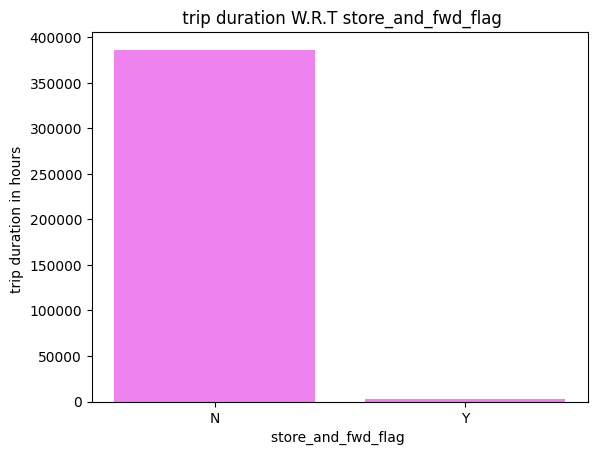

In [64]:
plt.bar(sff_df['store_and_fwd_flag'], sff_df['trip_duration']/3600,color ='violet')
plt.xlabel('store_and_fwd_flag ')
plt.xticks(['N','Y'])
plt.ylabel('trip duration in hours ')
plt.title(' trip duration W.R.T store_and_fwd_flag')
plt.show()

In [29]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,p_loc,d_loc,pickup_hour,dropoff_hour,week_day,weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,17,17,Monday,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Brooklyn,Brooklyn,0,0,Sunday,True
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Manhattan,Brooklyn,11,12,Tuesday,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Brooklyn,Brooklyn,19,19,Wednesday,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Manhattan,Manhattan,13,13,Saturday,True


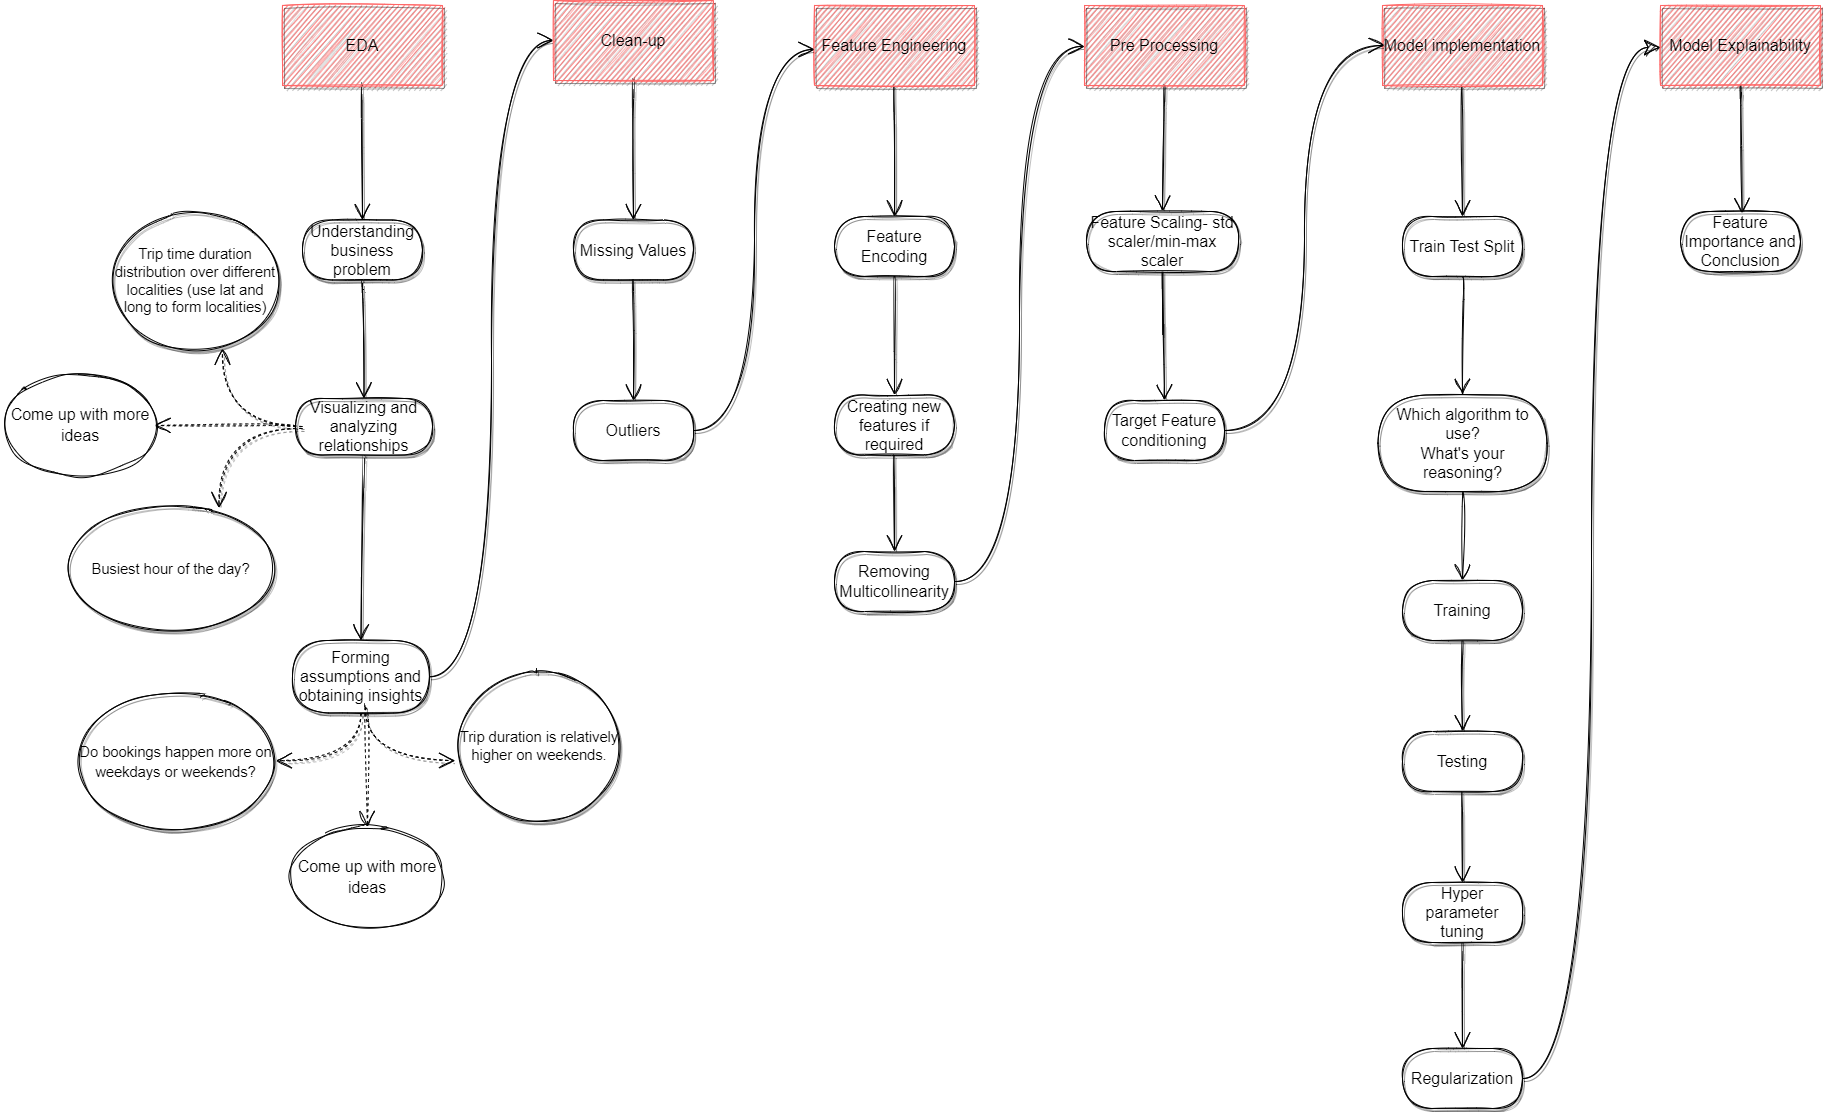

In [28]:
Image('https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/nyc_taxi_trip_time_f41f6cab2b.png')